In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [325]:
data = pd.read_csv("new_covid_data.csv")
data.head()

,date,state,aqi,cases,Population_Count
0,2020-01-24,Alabama,low,0.0,73181.865672
1,2020-01-24,Arizona,low,0.0,485247.800000
2,2020-01-24,Arkansas,low,0.0,40237.386667
3,2020-01-24,California,low,0.0,681245.224138
4,2020-01-24,Colorado,low,0.0,89980.250000


In [326]:
import time
import datetime

def unixTime(t):
    
    
    d = datetime.date(t.year,t.month,t.day)
    unixtimestamp = time.mktime(d.timetuple())
    return unixtimestamp


In [327]:
import category_encoders as ce


def splitState(state,df):
    df= df[df['state']==state]
    df.drop(columns=['state','Population_Count'],inplace=True)
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
    aqi_level = pd.get_dummies(df.aqi)
    df = pd.concat([df, aqi_level], axis=1)
    df['date'] = df['date'].map(lambda x: unixTime(x))

    return df
states = data.state.unique()

allstates_df={}

for state in states:
    allstates_df[state] = (splitState(state,data.copy()))


    

In [328]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

np.random.seed(123)

In [329]:
transformer = FunctionTransformer(np.log, validate=True)

In [330]:
from sklearn.linear_model import LinearRegression

def modeller(state_name):
    allstates_df[state_name].date = allstates_df[state_name].date/1e09
    x_samp, y_samp = allstates_df[state_name].date.values.reshape(-1, 1),allstates_df[state_name].cases.values.reshape(-1, 1)

    y_trans = transformer.fit_transform(y_samp)         
    y_trans = np.where(y_trans==float('-inf') , 0, y_trans)


    # Regression
    results = LinearRegression().fit(x_samp, y_trans)            
    y_fit = results.predict(x_samp)
    
    # Visualization
    f, ax = plt.subplots(figsize=(10,15))
    ax.scatter(x_samp, y_samp)
    ax.plot(x_samp, np.exp(y_fit), "gx", label="Fit")  
    title = state_name+' Exponential Curve fitting'
    ax.set_title(title)
    ax.set_xlabel('Dates in Unix Time stamp Format')
    ax.set_ylabel('Cases')
    ax.legend()
    figure_title= 'plots/'+state_name+'.png'
    f.savefig(figure_title)
    
    return ((abs(results.score(x_samp, y_samp)))*100)

In [331]:
allstates_df['Alabama'].tail()

,date,aqi,cases,low,medium
4277,1.587355e+09,low,5242.0,1,0
4327,1.587442e+09,low,5500.0,1,0
4377,1.587528e+09,low,5789.0,1,0
4427,1.587614e+09,low,6034.0,1,0
4477,1.587701e+09,low,6235.0,1,0


1 The r^2 score for  Alabama  is: 34.92678066934507
2 The r^2 score for  Arizona  is: 34.76525293539214
3 The r^2 score for  Arkansas  is: 32.486538464318016
4 The r^2 score for  California  is: 36.091938071093914
5 The r^2 score for  Colorado  is: 36.46952843479563
6 The r^2 score for  Connecticut  is: 29.076234234854237
7 The r^2 score for  Delaware  is: 26.930324055059906
8 The r^2 score for  Florida  is: 35.45357457159639
9 The r^2 score for  Georgia  is: 33.229996970646205
10 The r^2 score for  Hawaii  is: 37.673954807382025
11 The r^2 score for  Idaho  is: 36.58141531198973
12 The r^2 score for  Illinois  is: 31.795656641994064
13 The r^2 score for  Indiana  is: 31.954838557769726
14 The r^2 score for  Kansas  is: 30.881422177295526
15 The r^2 score for  Kentucky  is: 28.821018554167523
16 The r^2 score for  Louisiana  is: 36.52389723028273
17 The r^2 score for  Maine  is: 38.99470610798763
18 The r^2 score for  Maryland  is: 28.077516177110006
19 The r^2 score for  Massachusetts

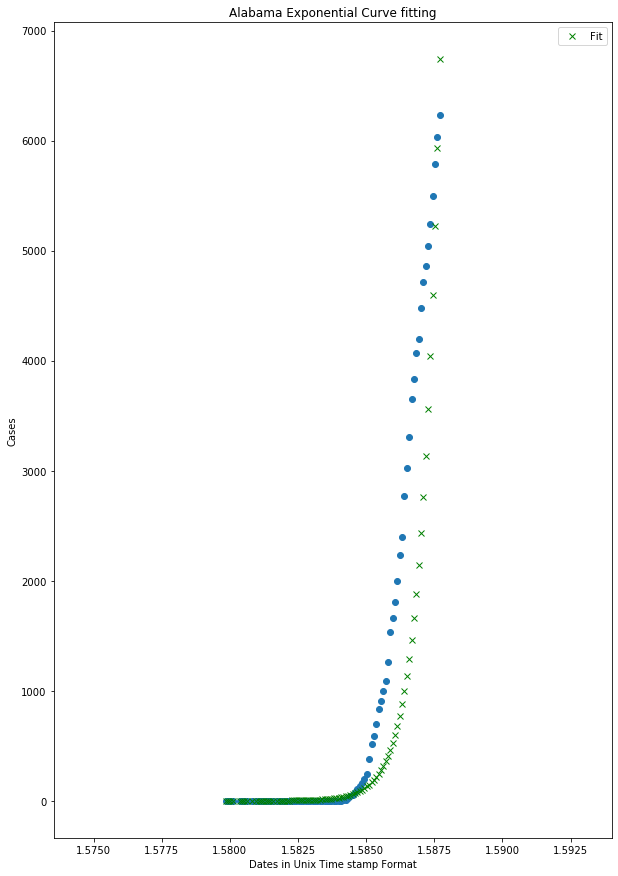

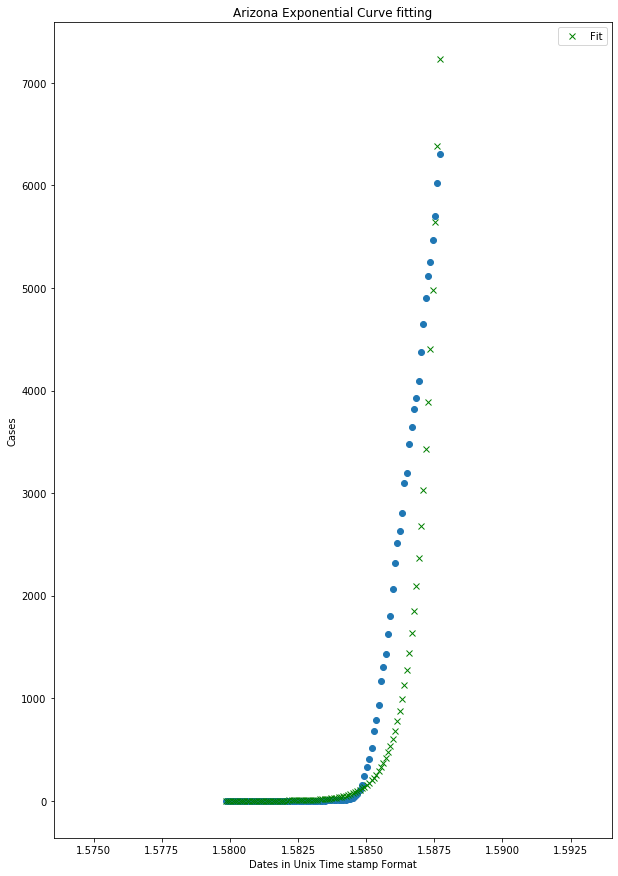

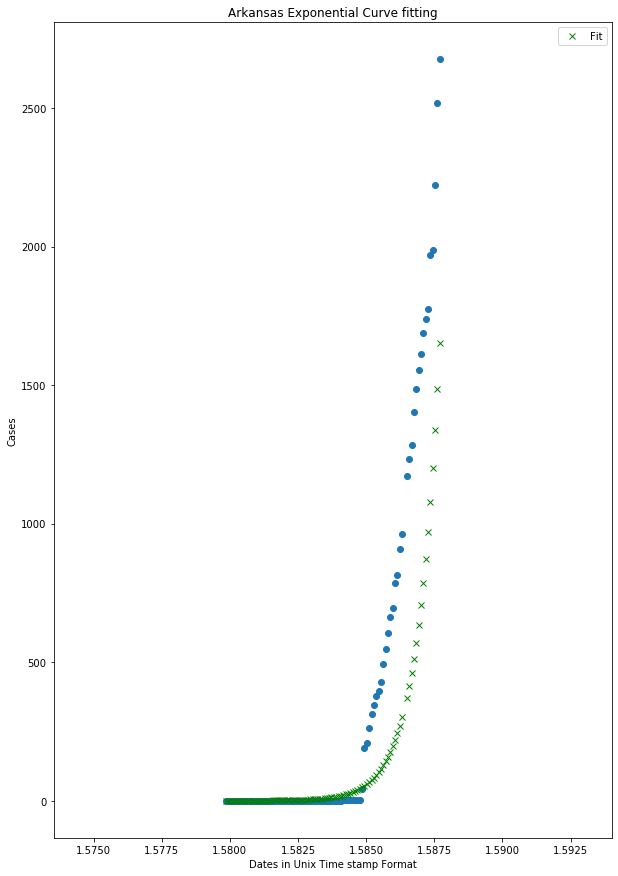

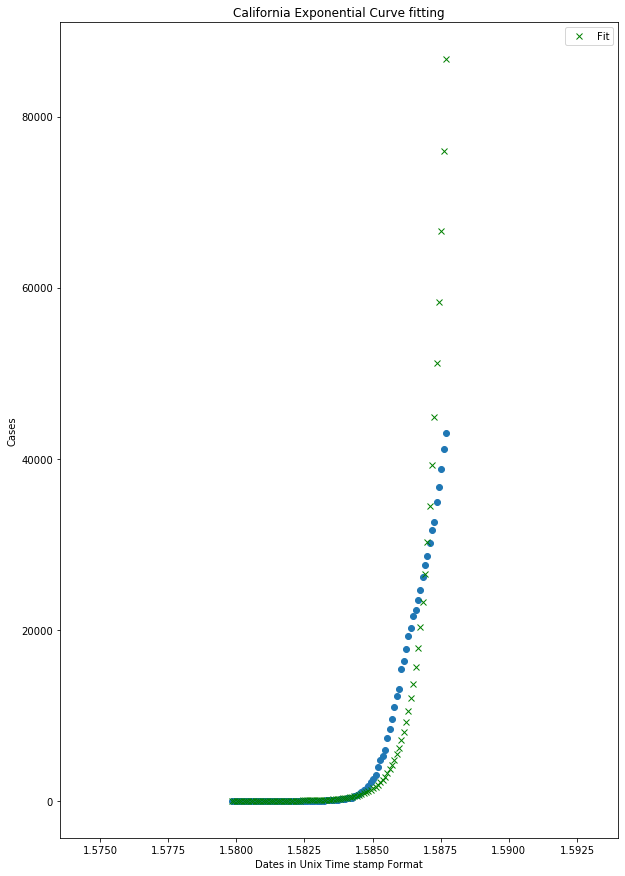

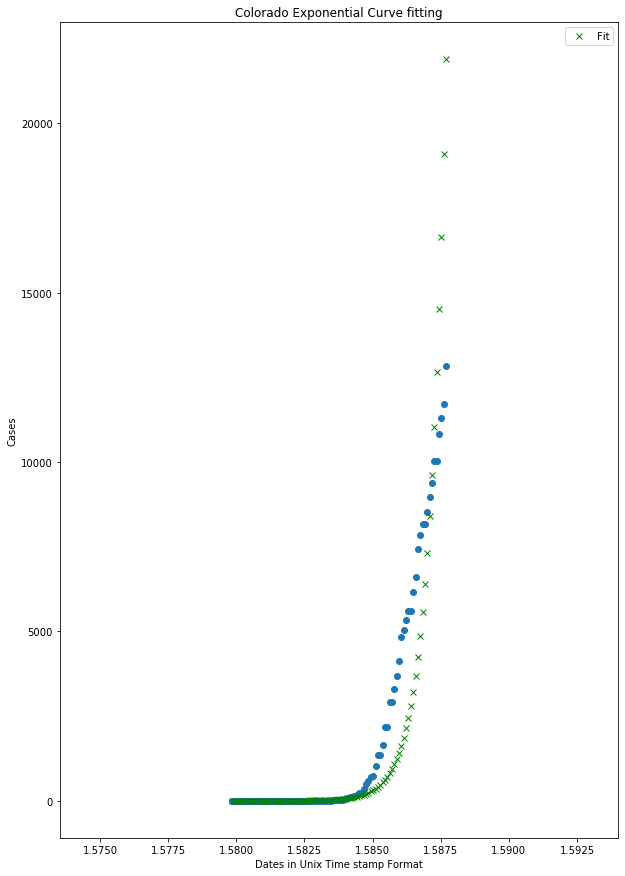

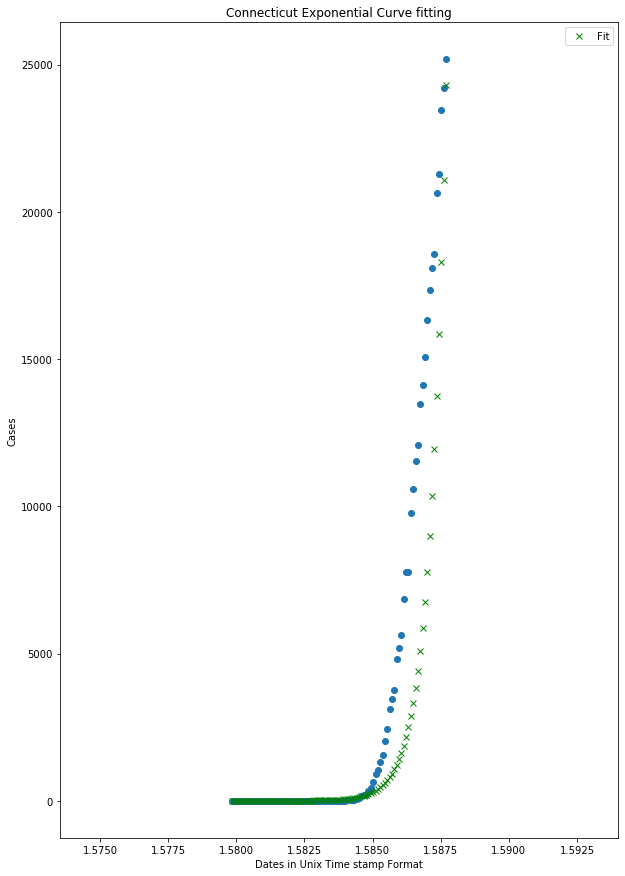

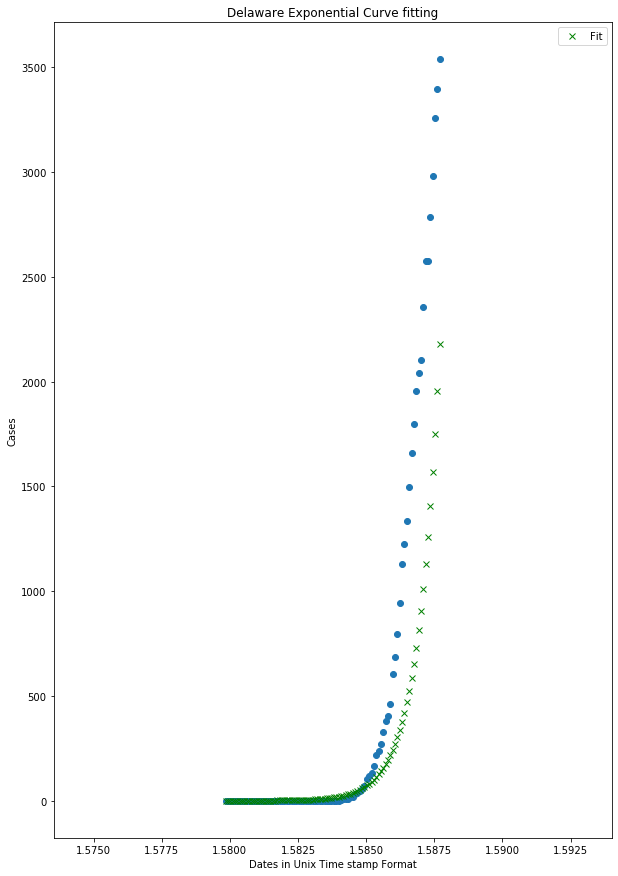

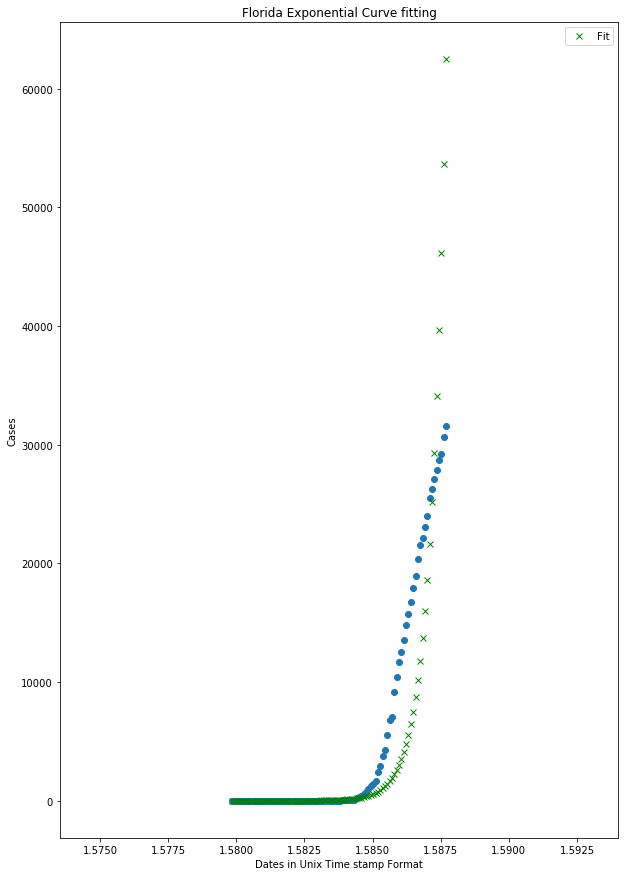

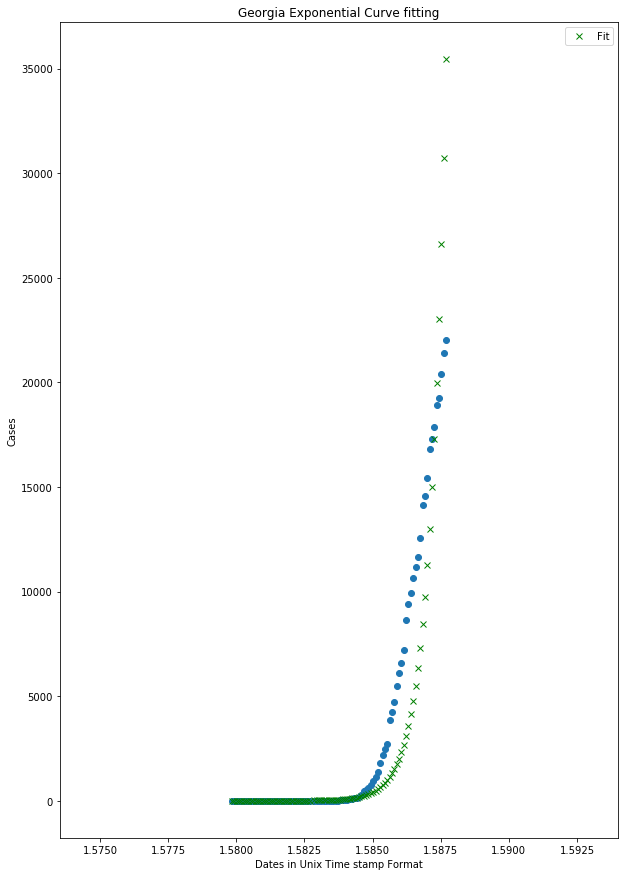

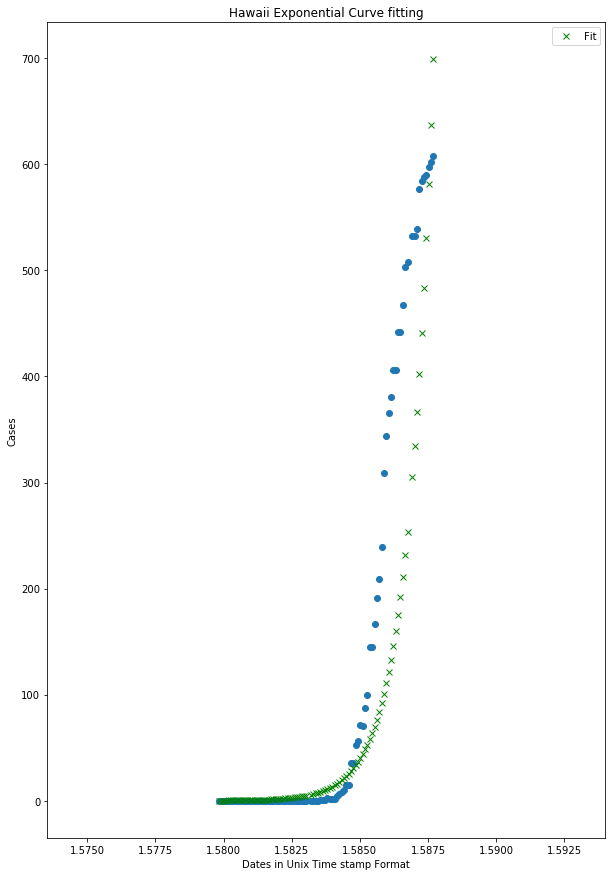

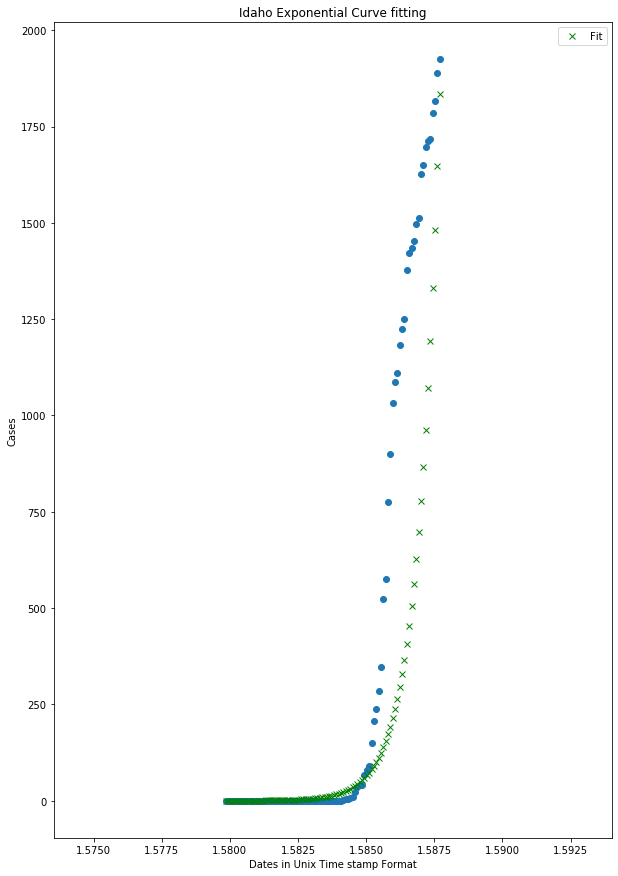

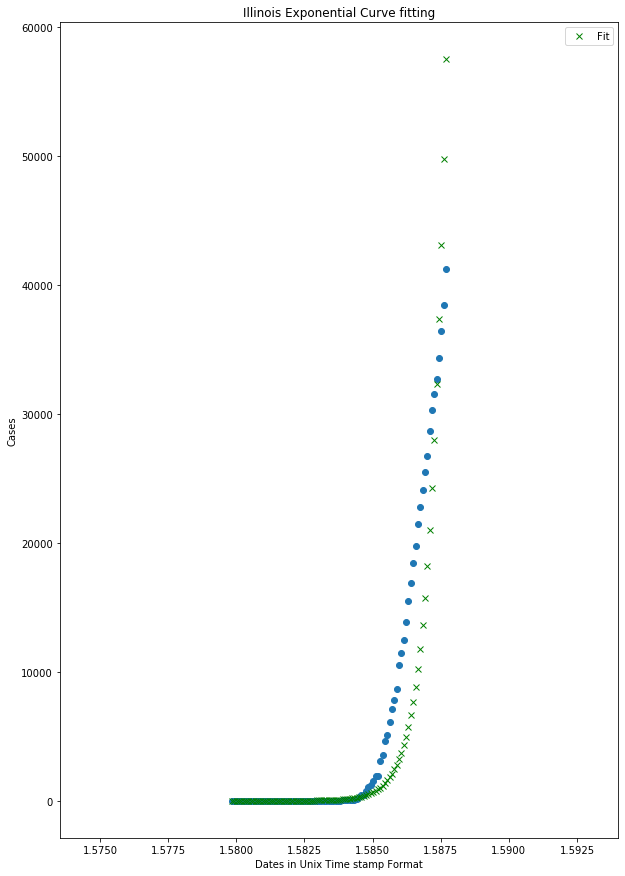

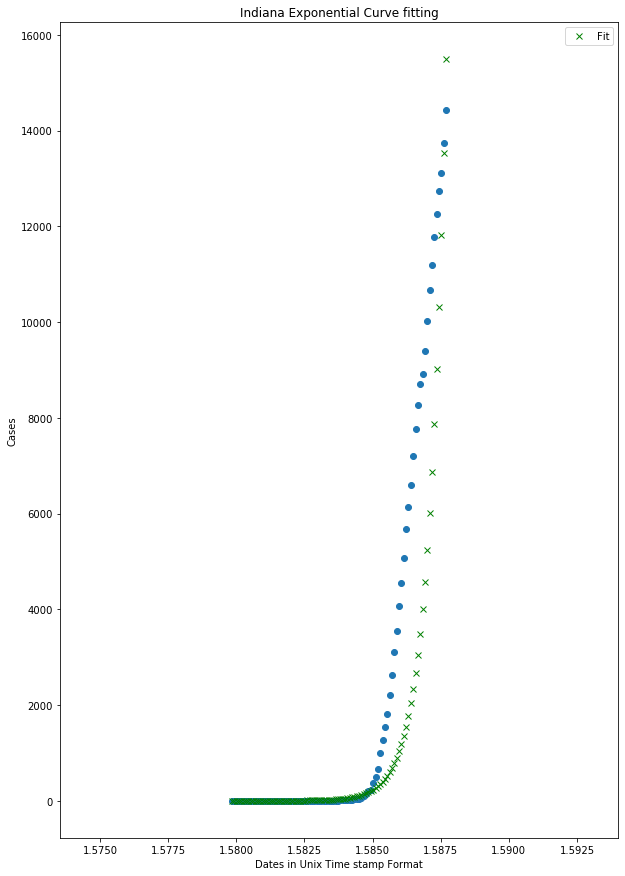

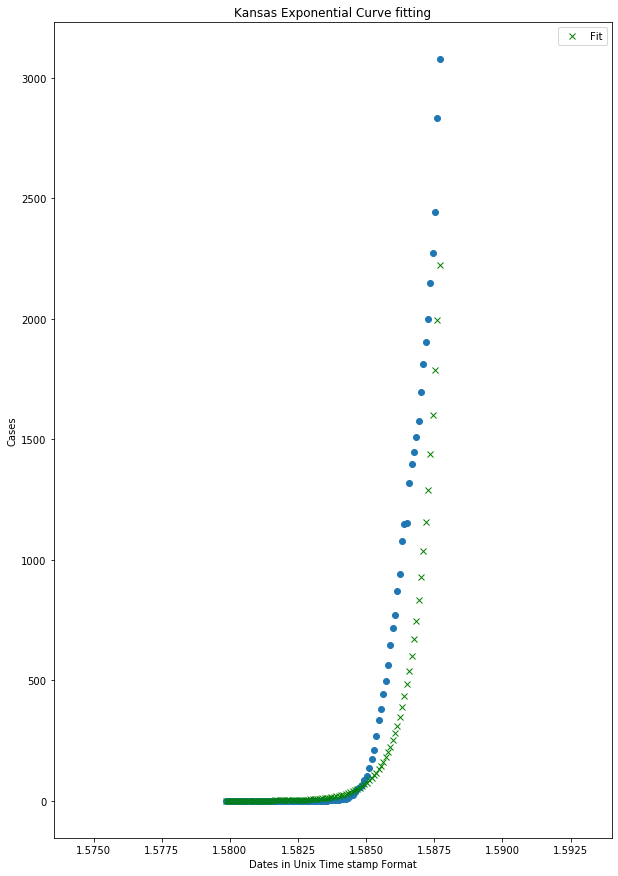

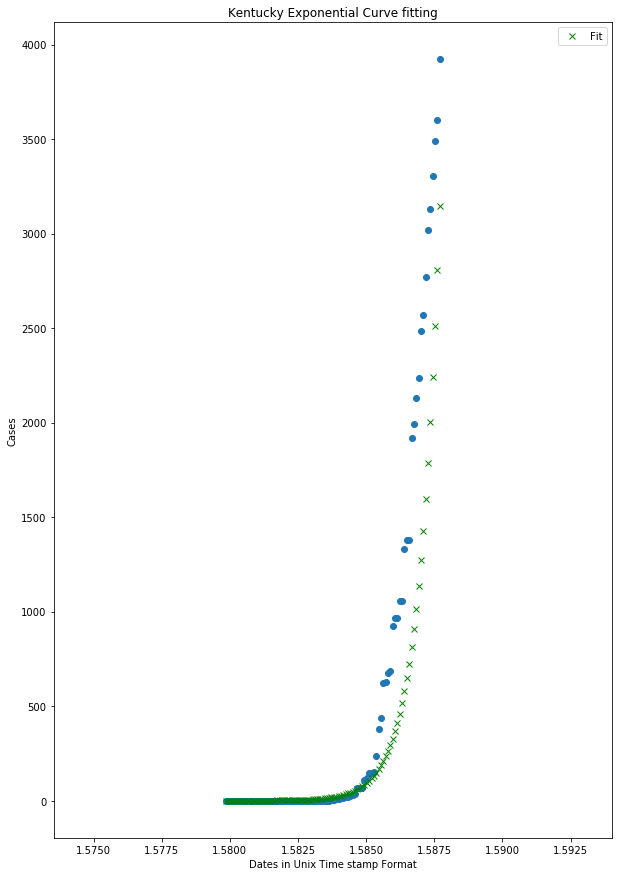

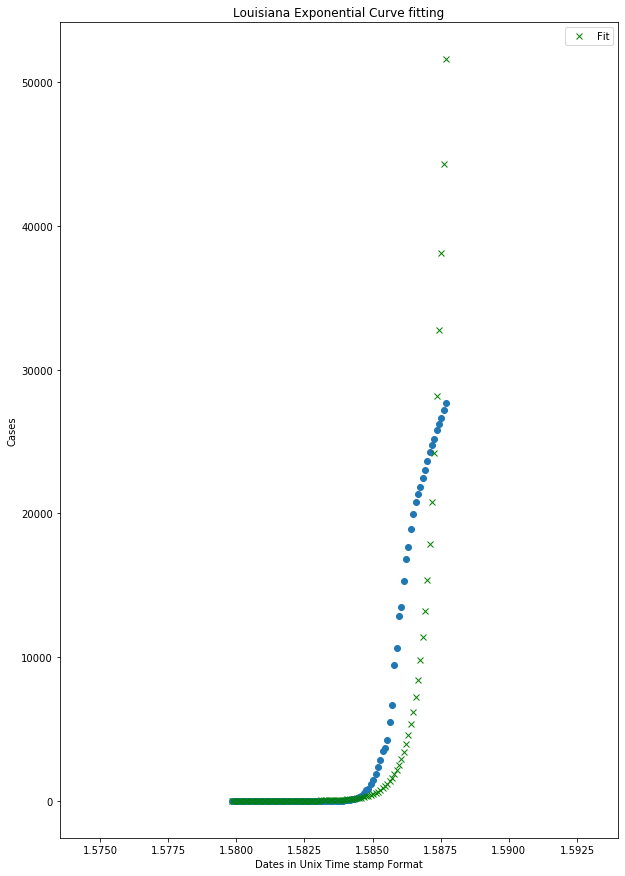

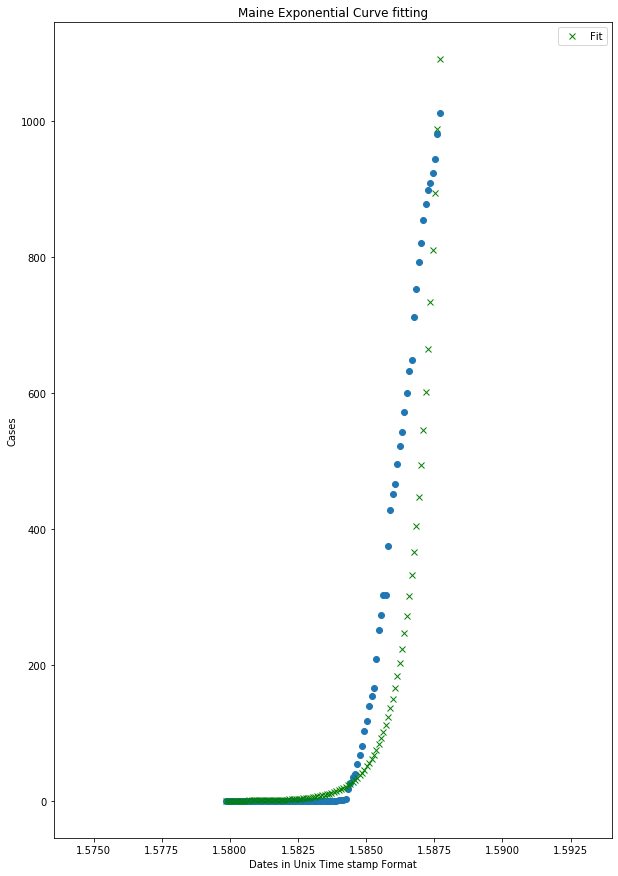

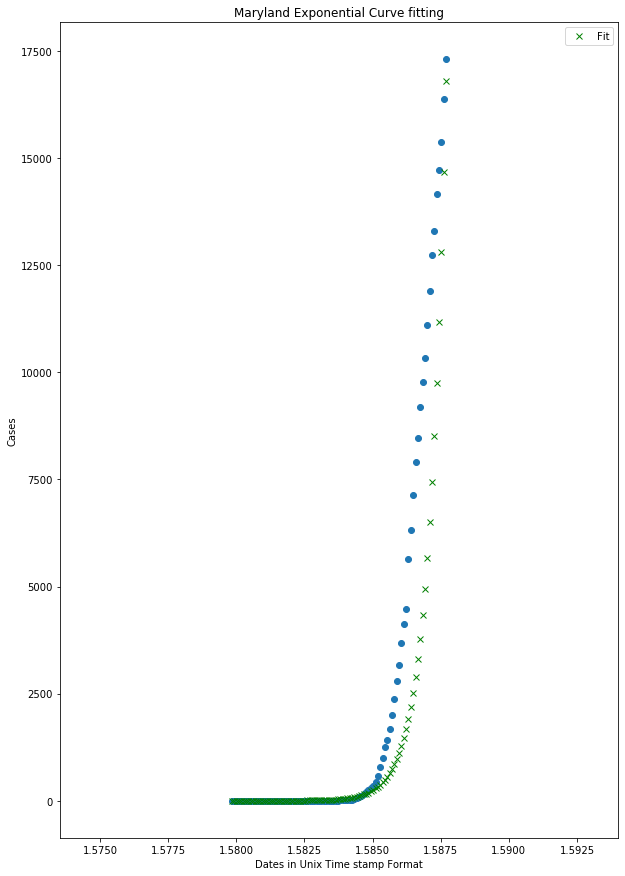

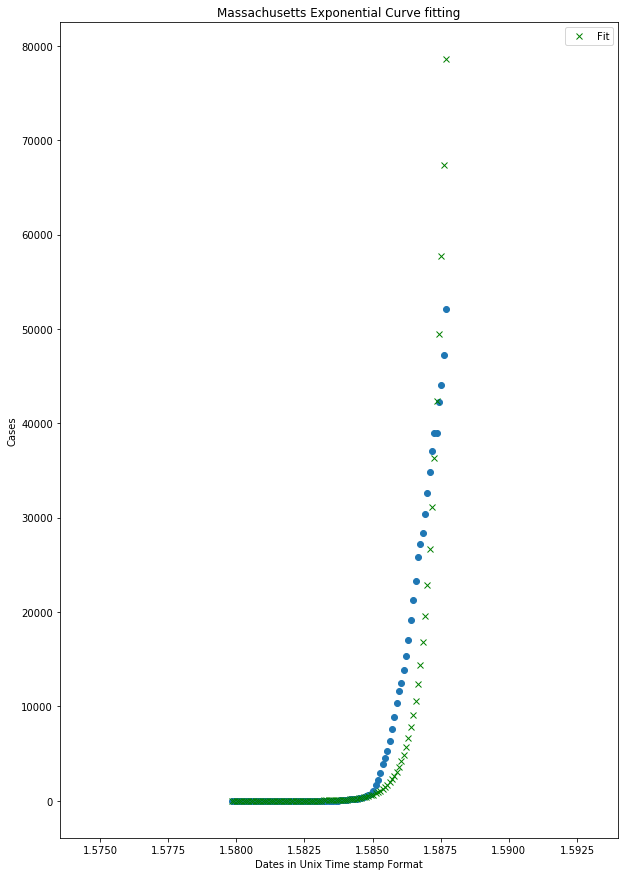

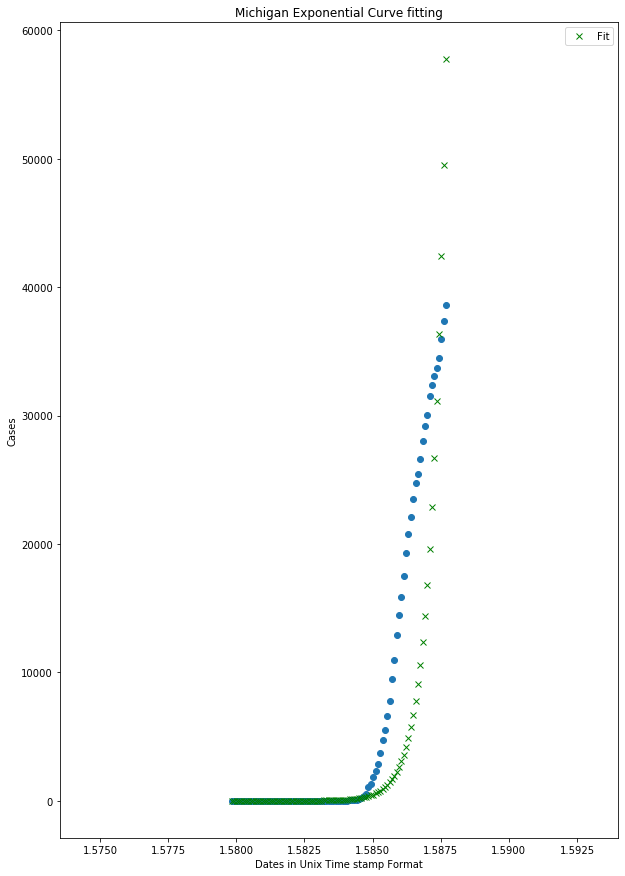

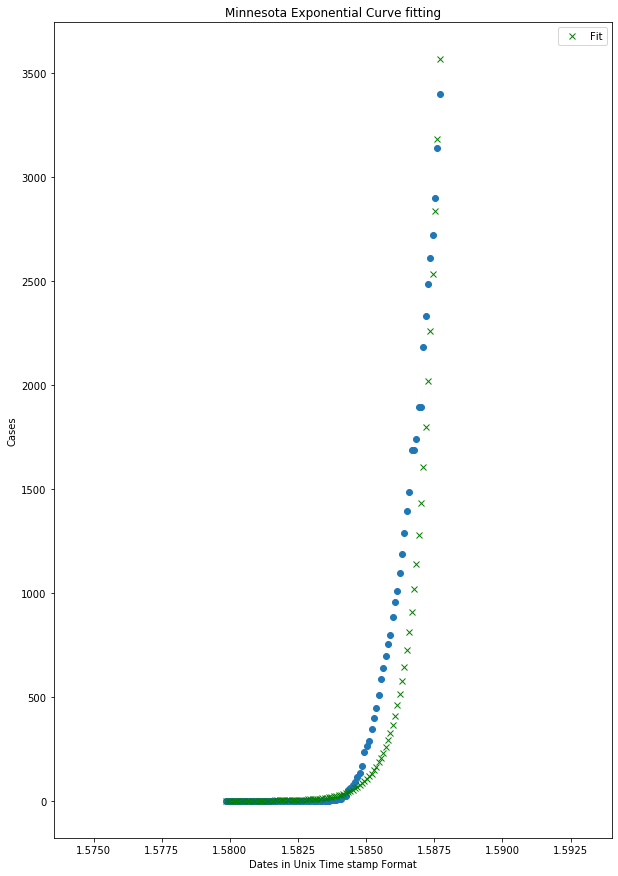

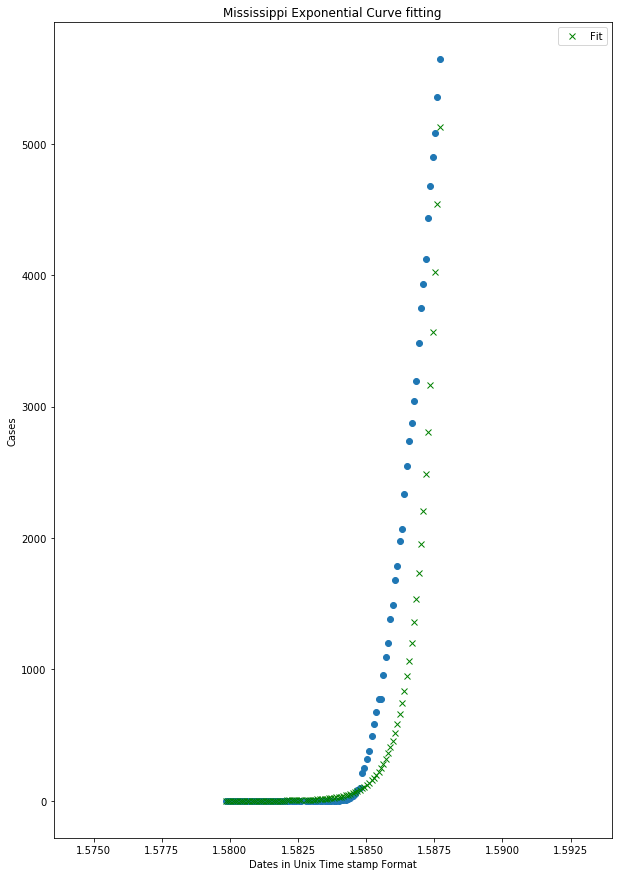

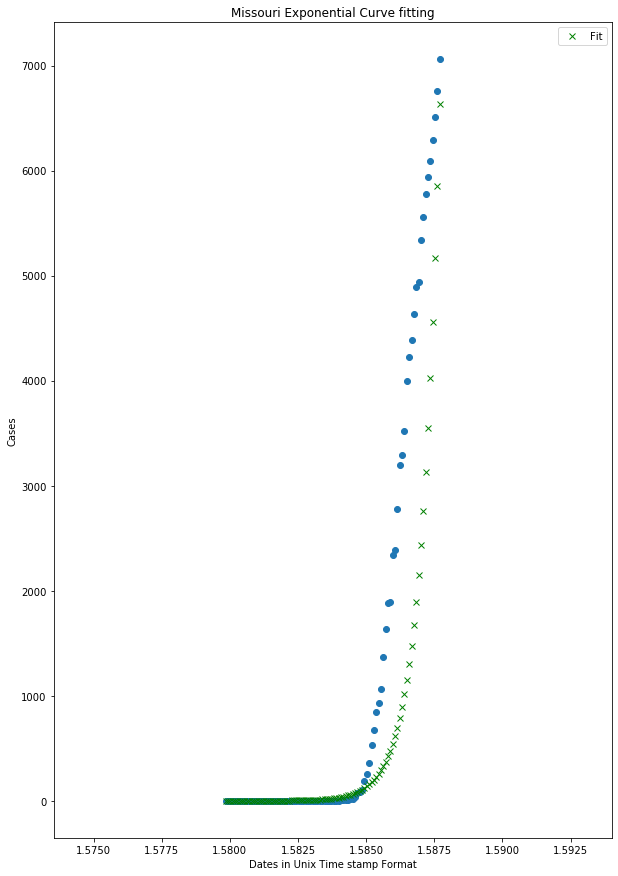

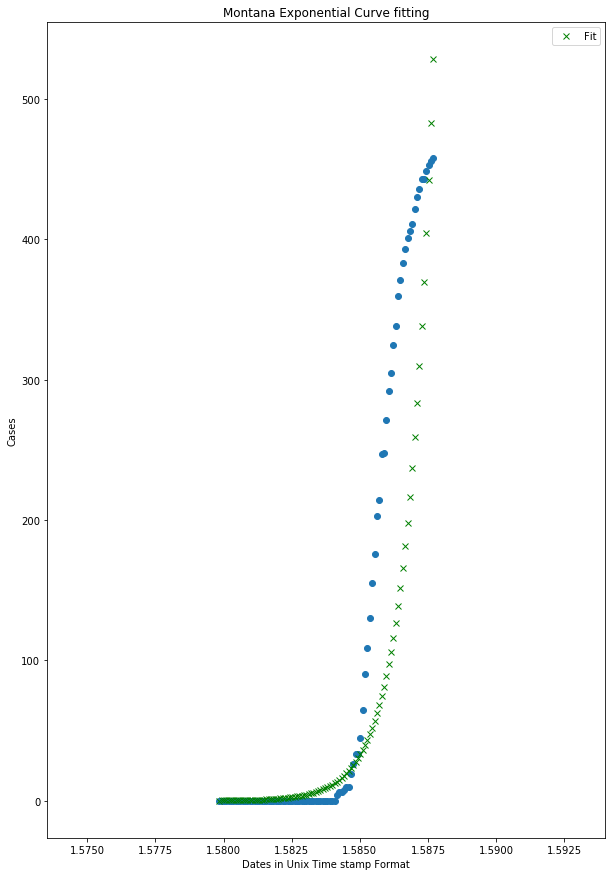

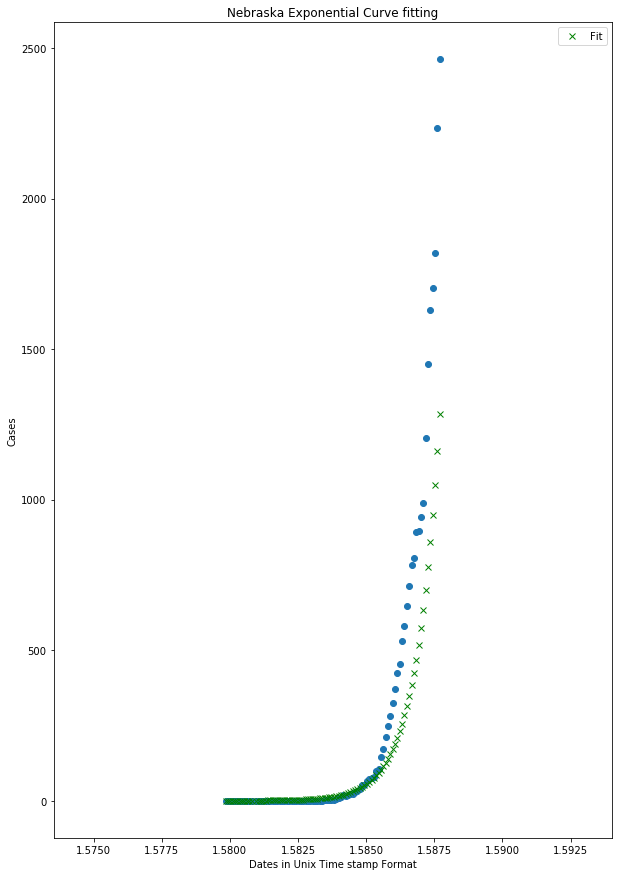

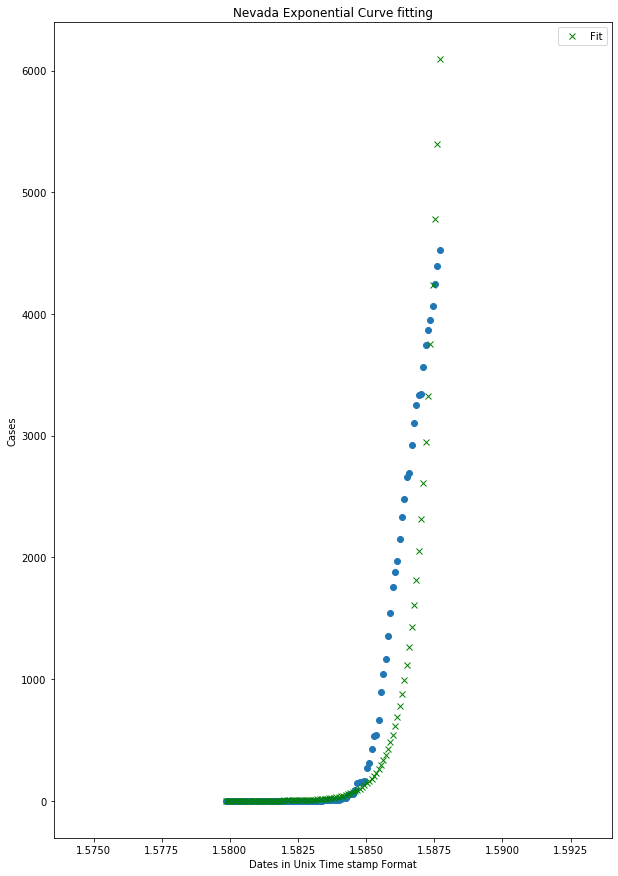

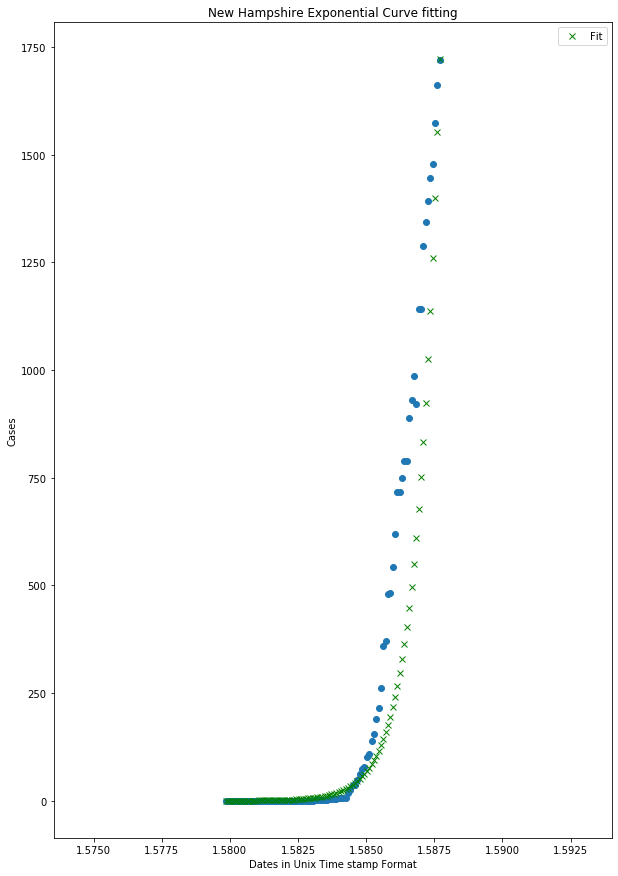

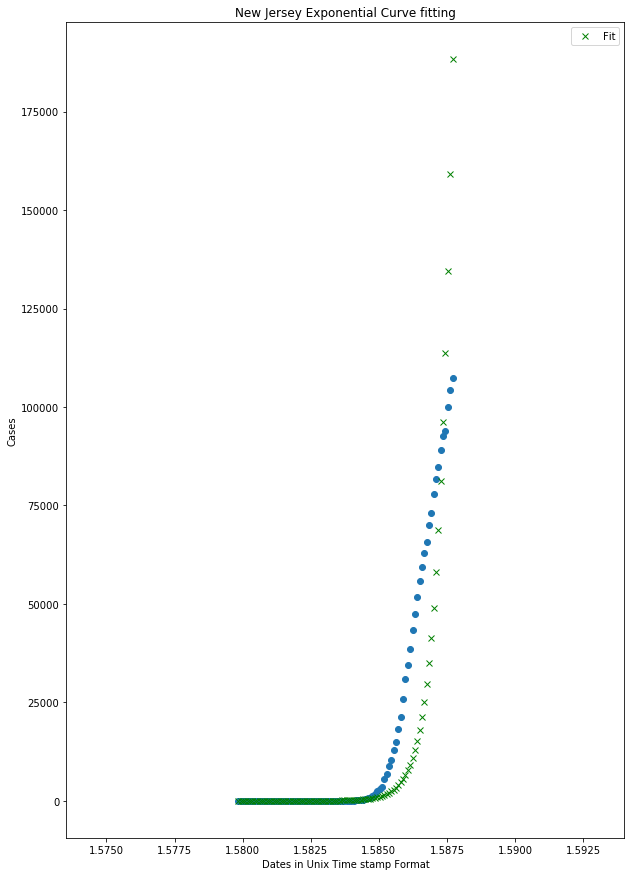

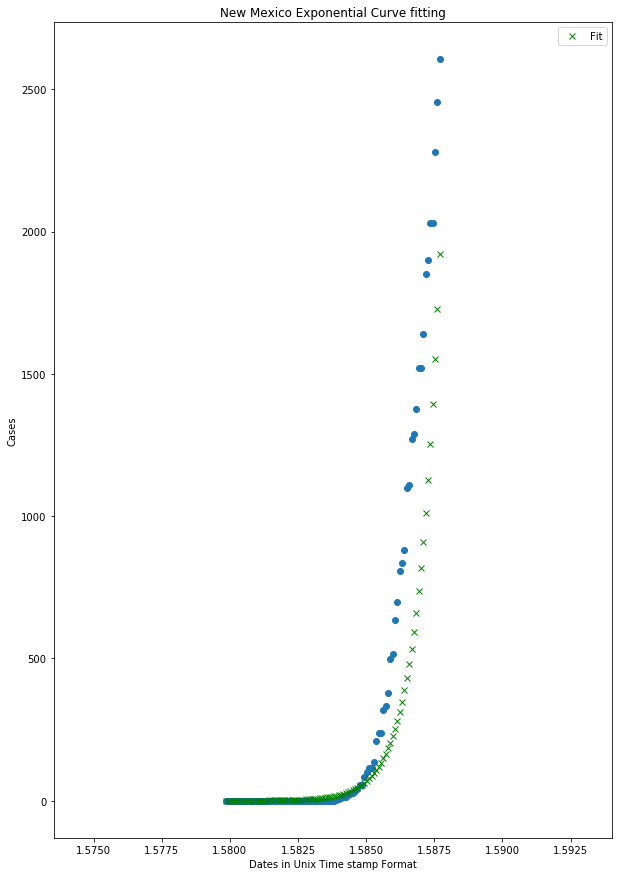

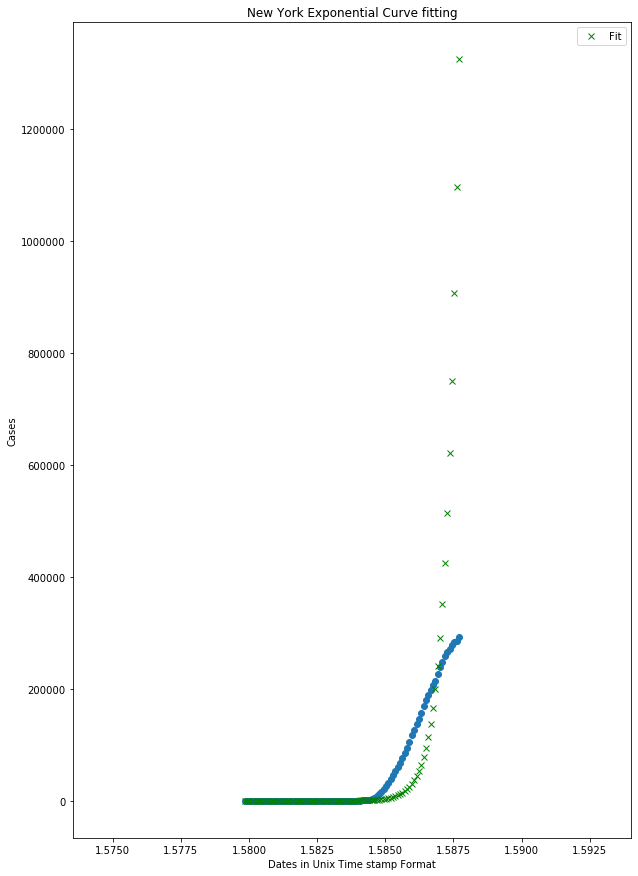

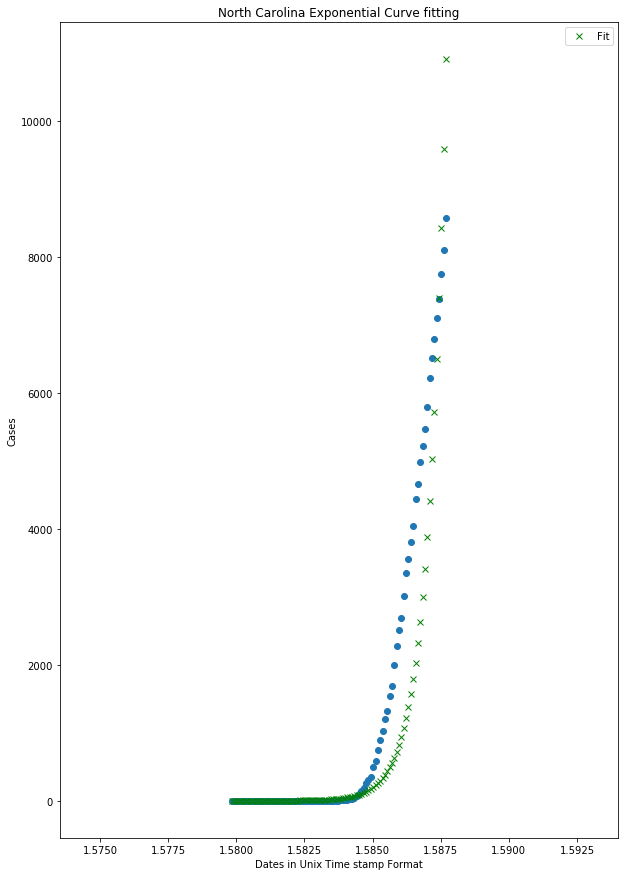

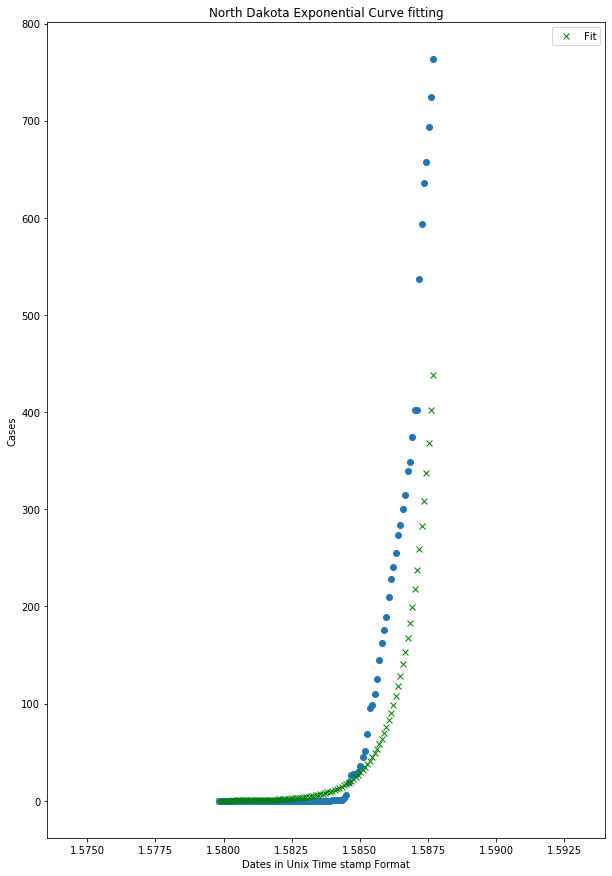

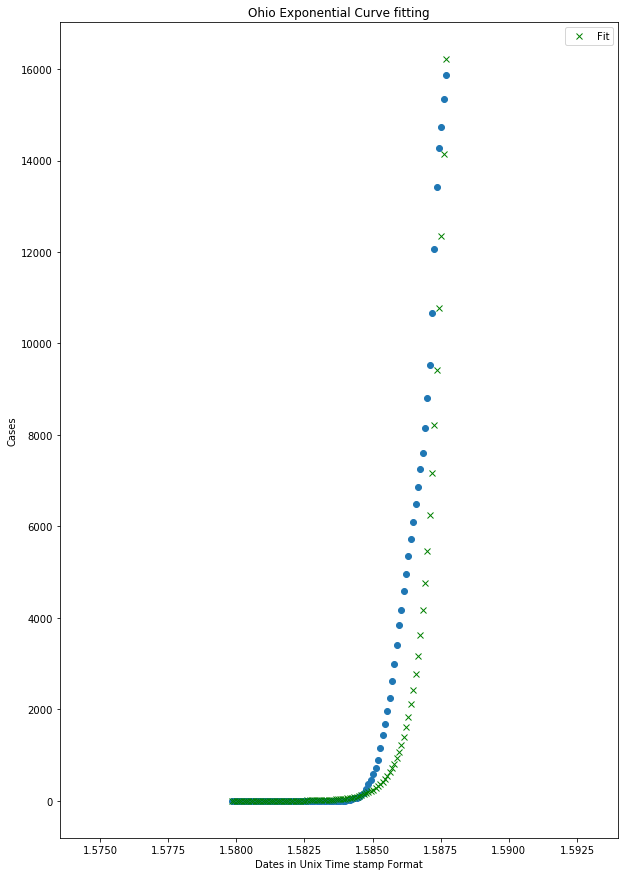

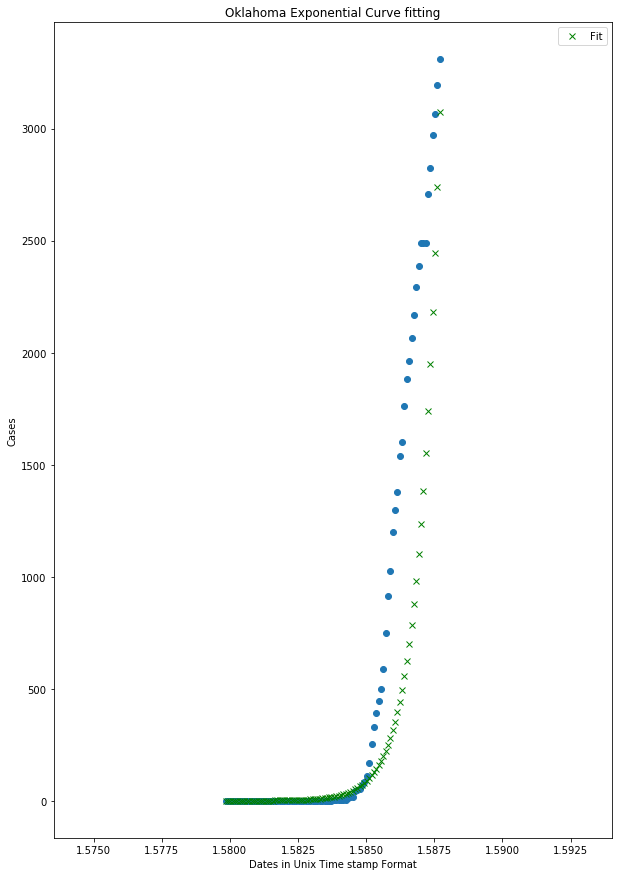

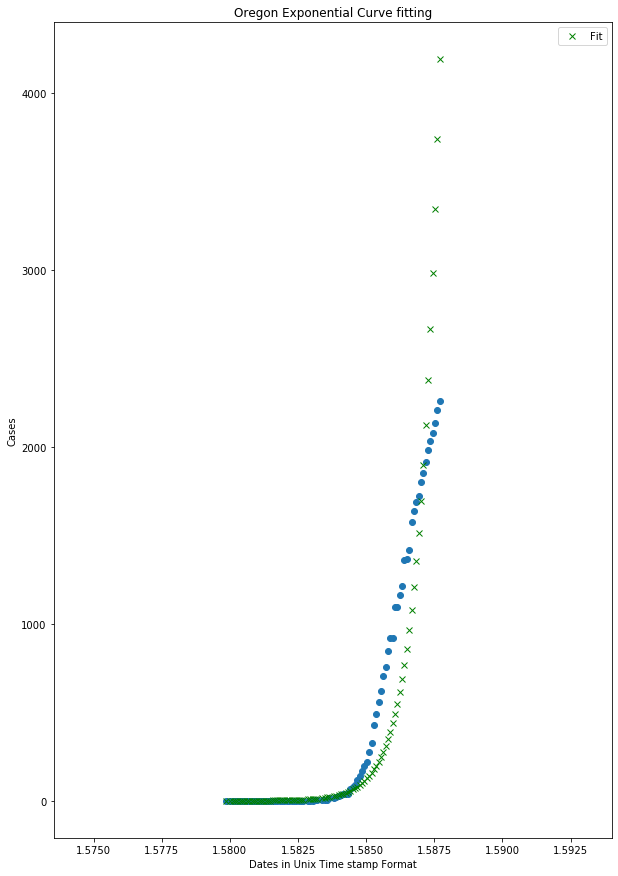

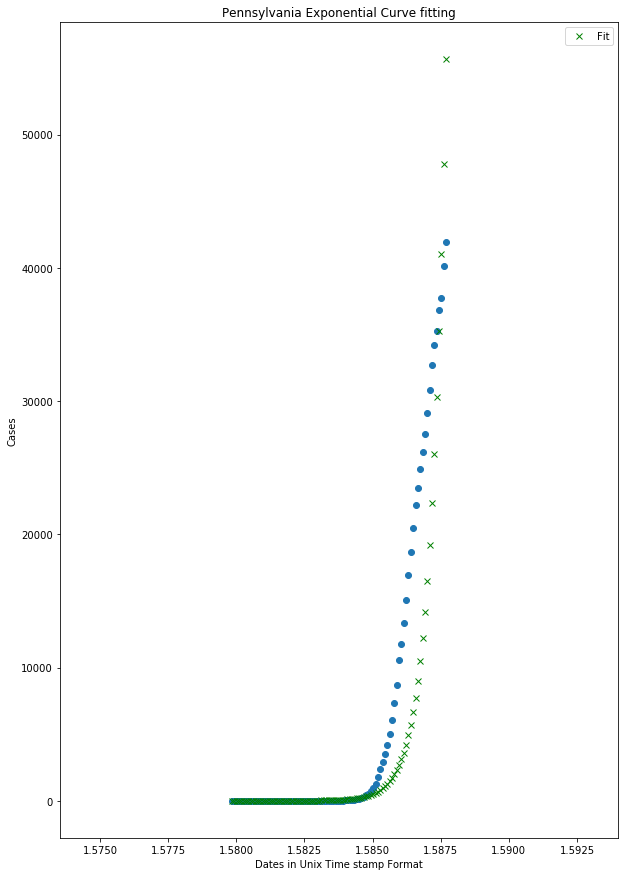

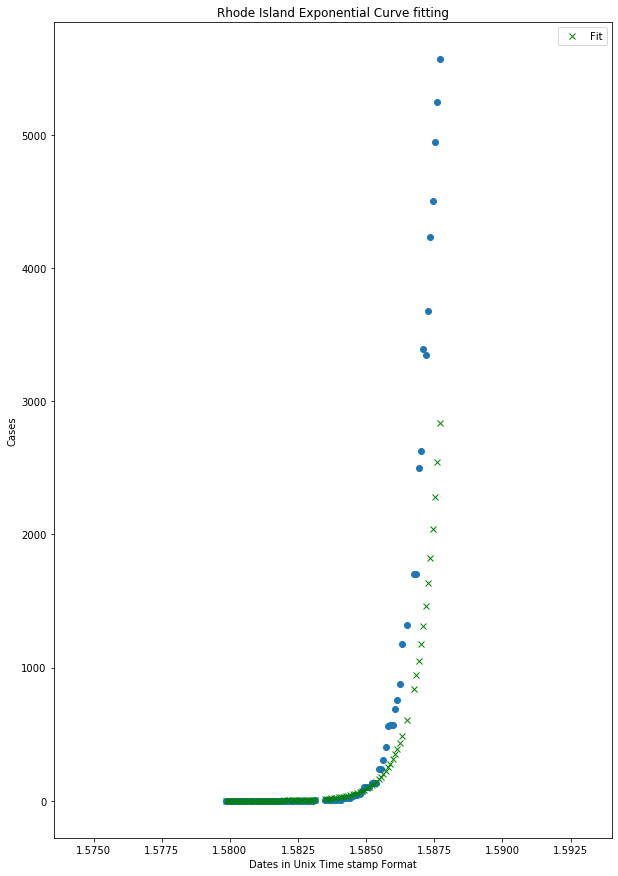

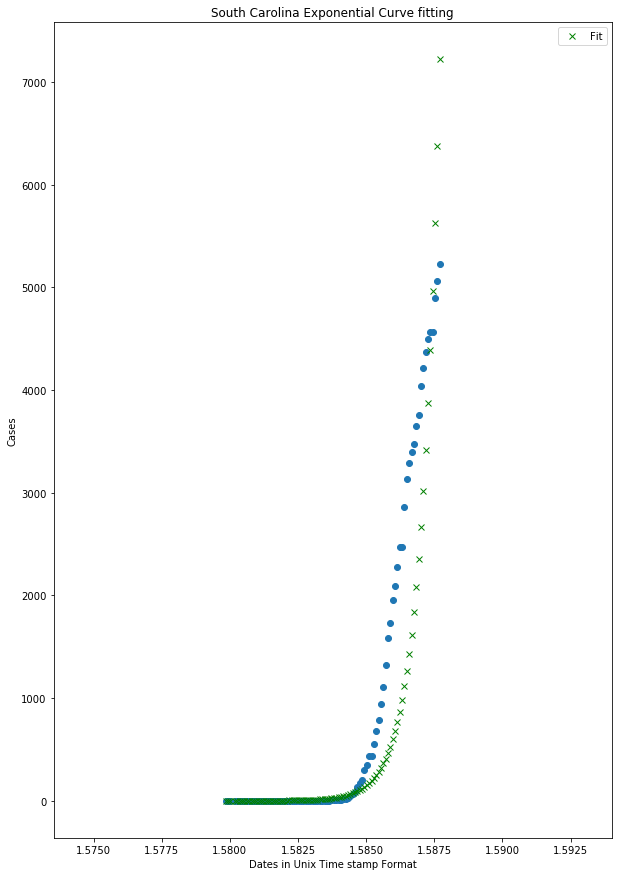

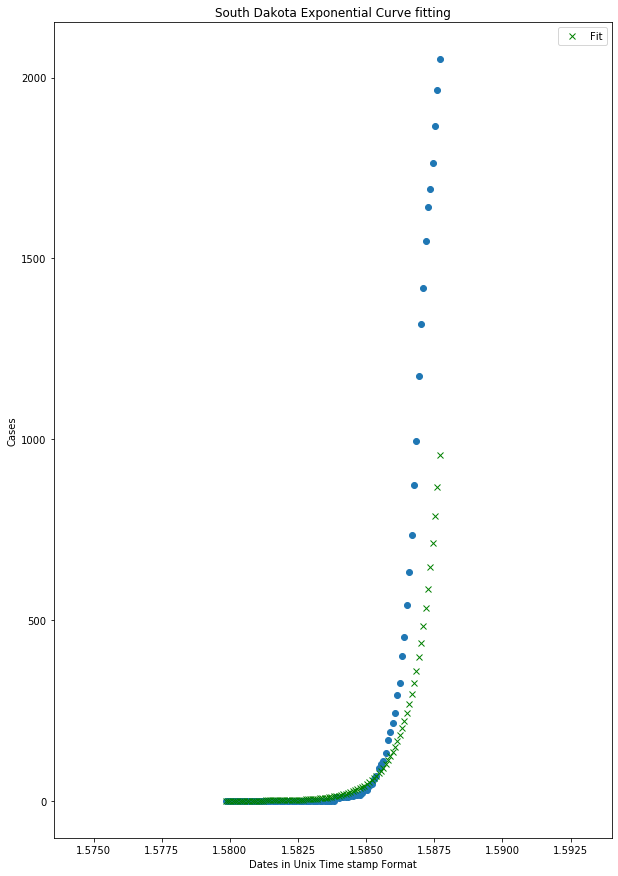

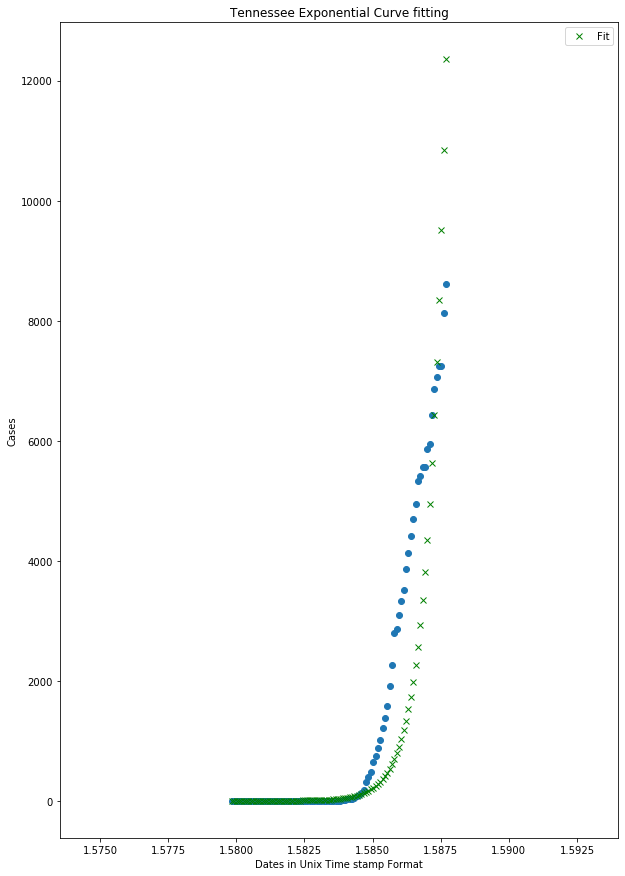

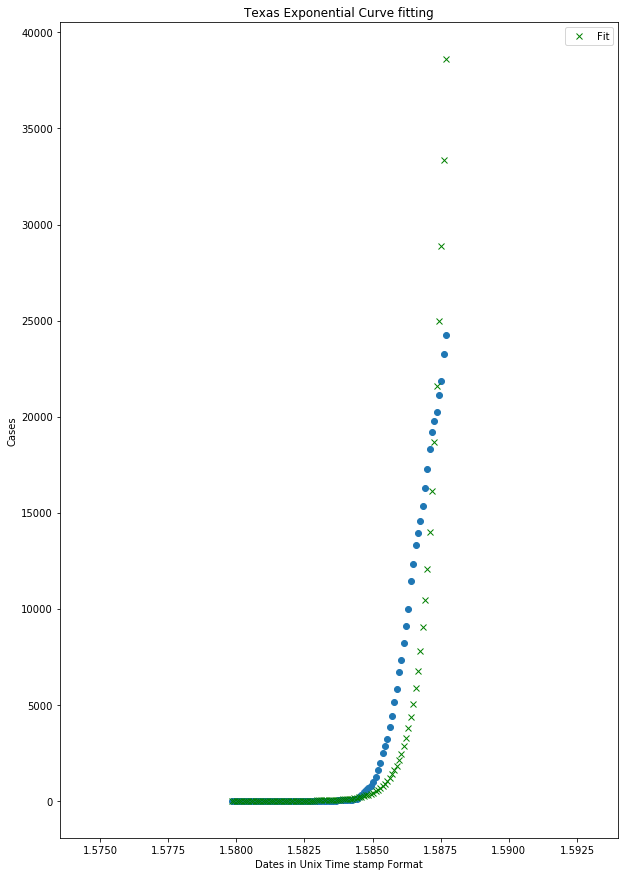

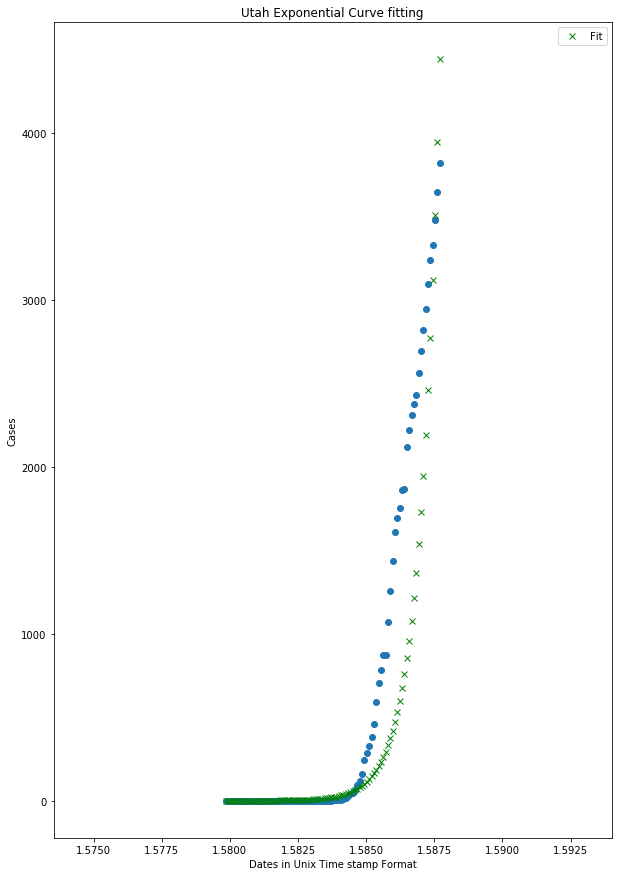

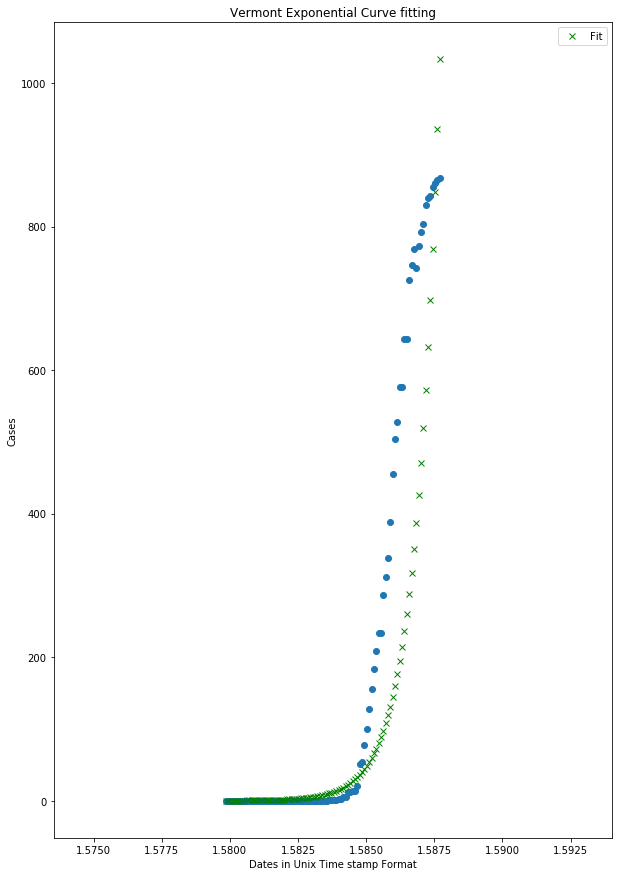

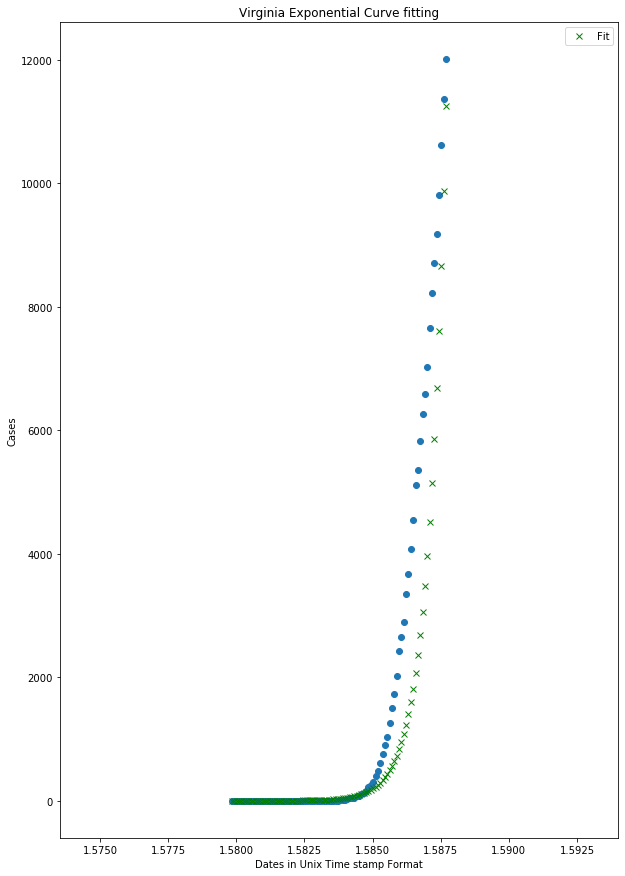

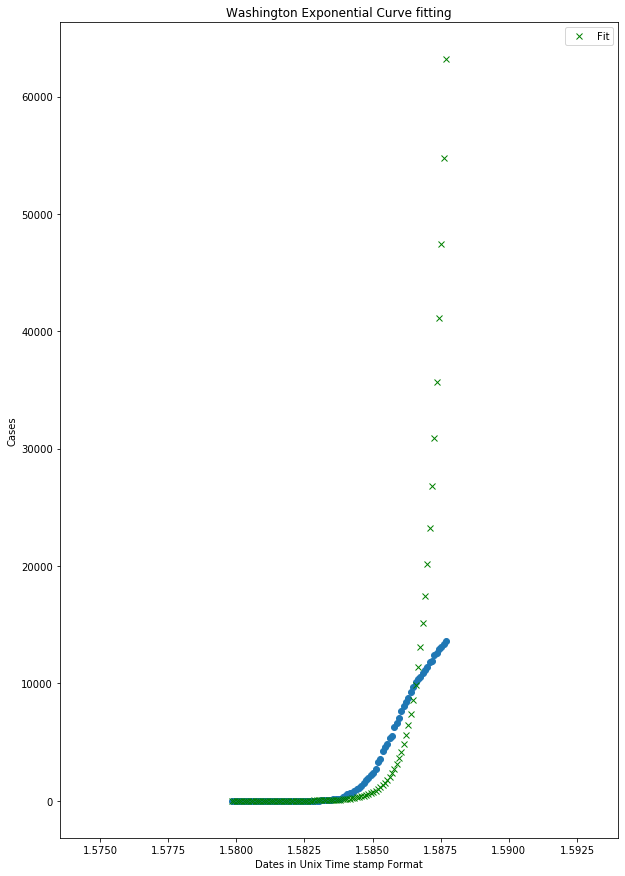

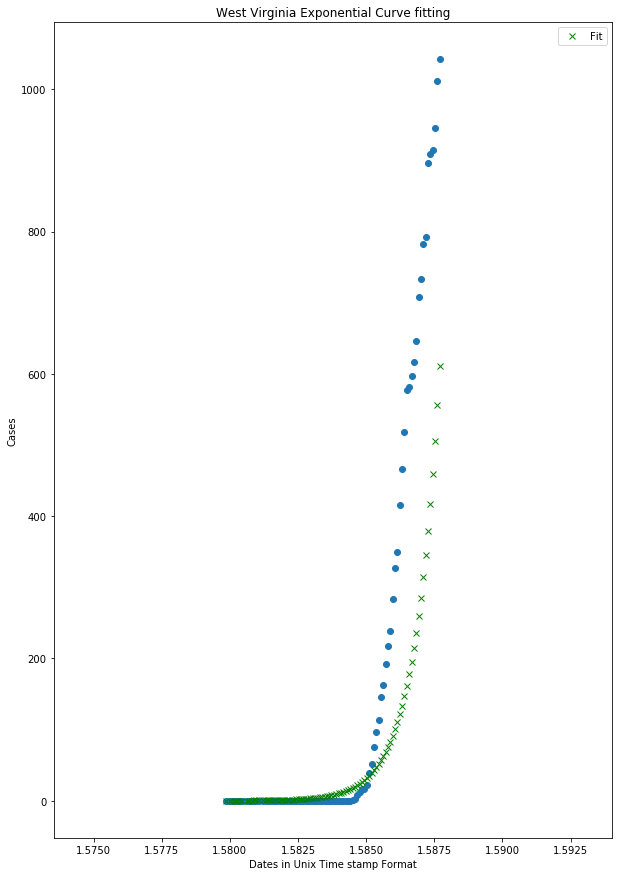

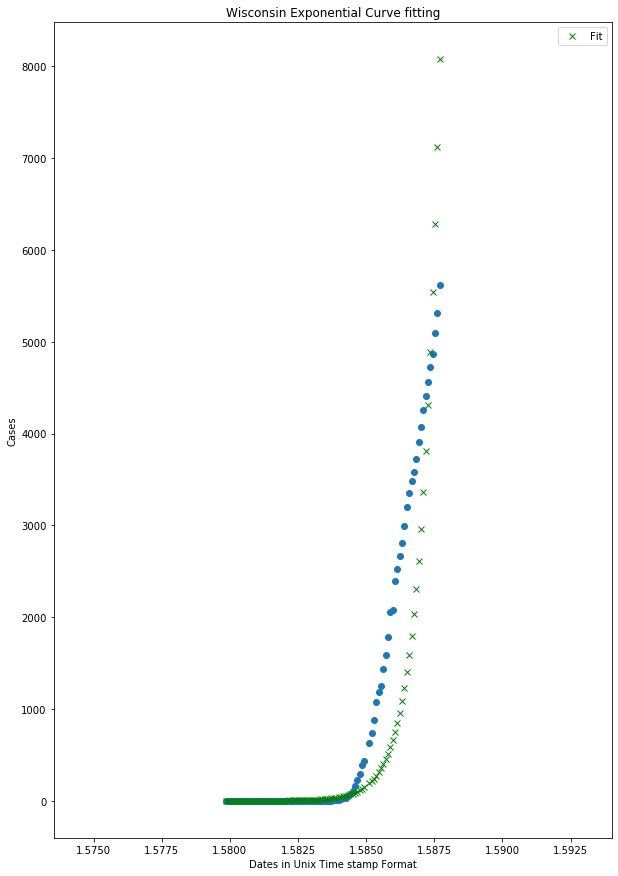

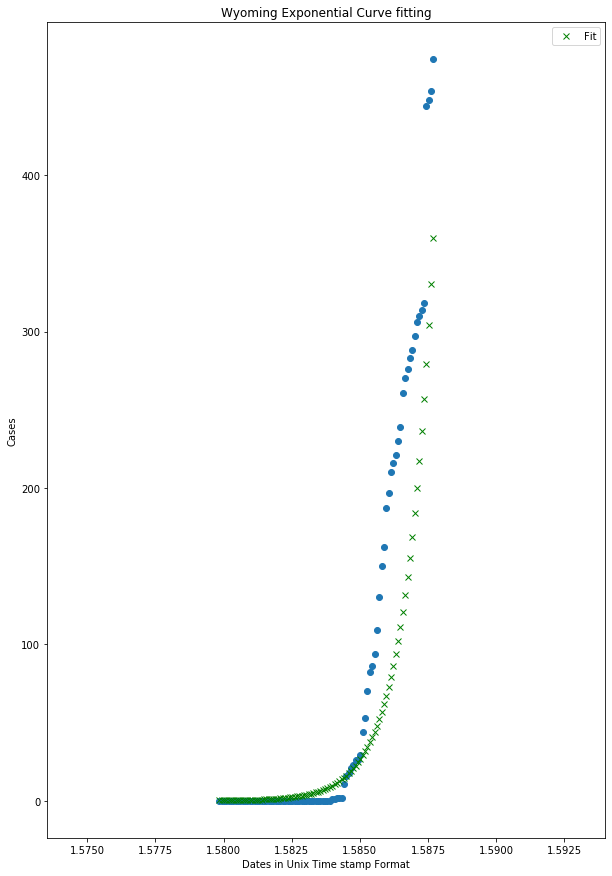

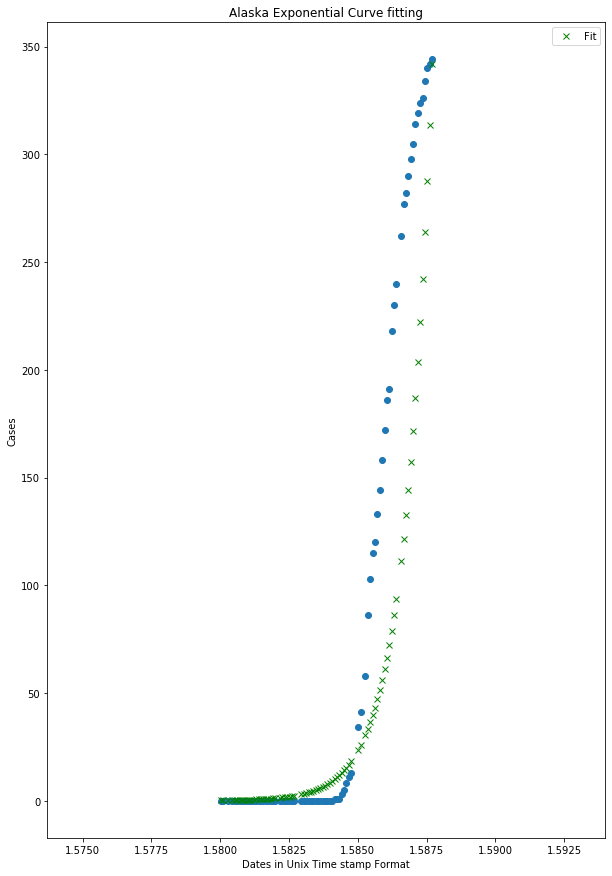

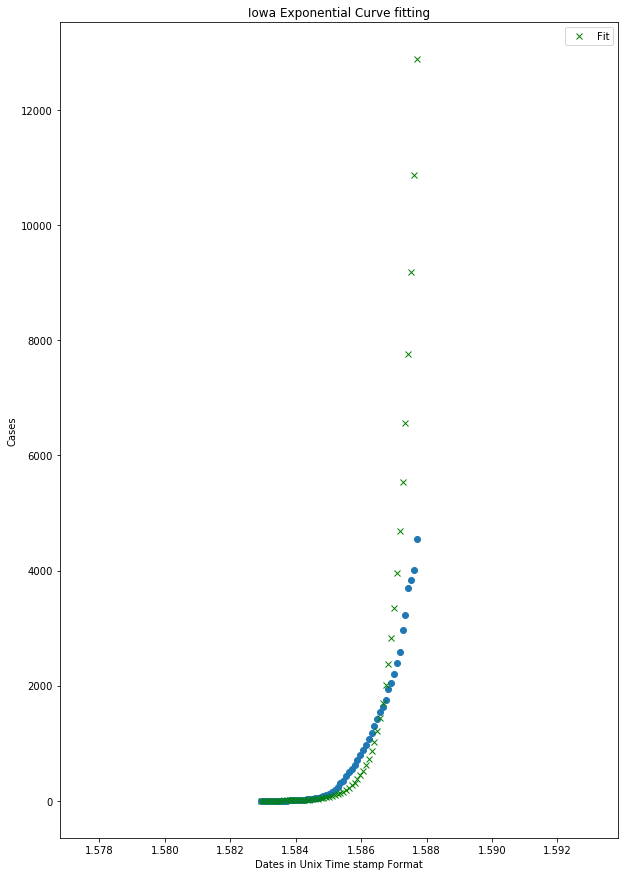

In [332]:
index=0
for states,dataframe in allstates_df.items():
    index+=1
    print(index,'The r^2 score for ',states,' is:',modeller(states))